In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Loading the data

In [2]:
# the MNIST dataset is part of the keras package, so we can load it directly from there:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspecting the data

In [3]:
# How much data do we have? 
print("Training Set Images:", len(y_train))
print("Testing Set Images:", len(X_test))

Training Set Images: 60000
Testing Set Images: 10000


In [4]:
# What do the data look like?
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
# What does the dependent (target) variable look like?
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# How many pixels per image?
X_train[0].shape

(28, 28)

In [9]:
# 28x28. this means our total amount of pixels is:
total_pixels = X_train[0].shape[0] * X_train[0].shape[1]
total_pixels

784

In [10]:
# How are colors represented? => HEX from 0 to 255
np.unique(X_train[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

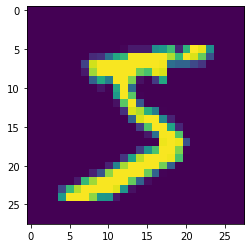

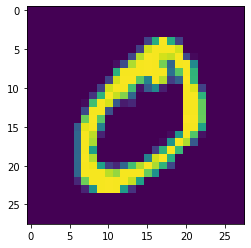

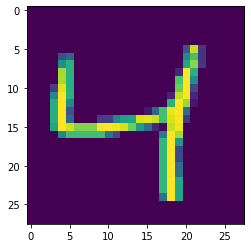

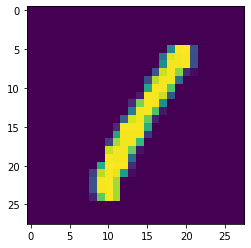

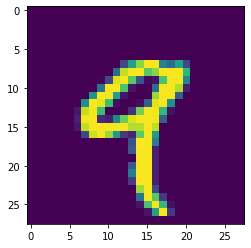

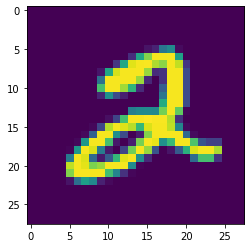

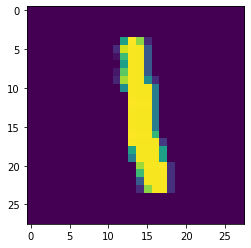

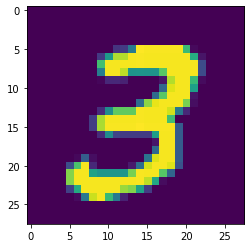

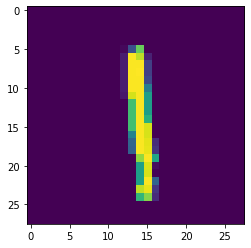

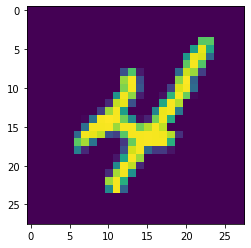

In [11]:
# They are arrays of pixels in black and white. 0 is a white pixel, 1 a black one.
# Let's visualize the first 10:

for i in range (10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.show()

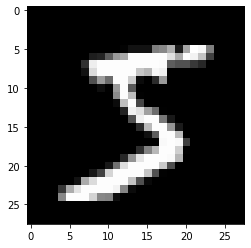

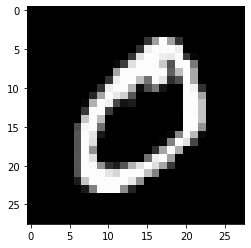

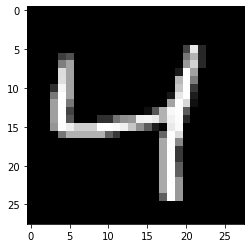

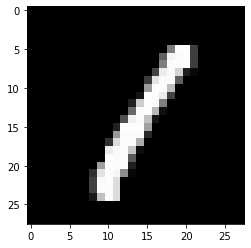

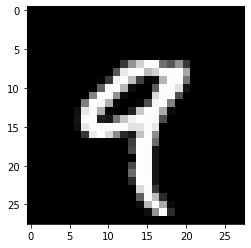

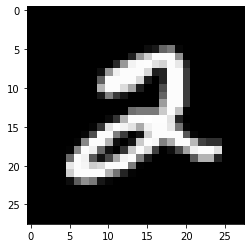

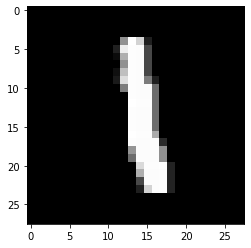

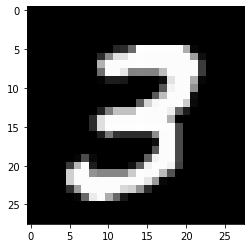

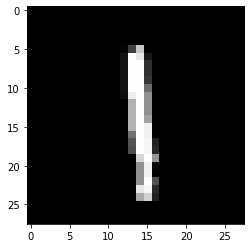

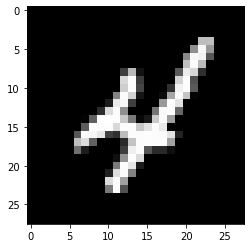

In [12]:
# Maybe color doesn't matter so much when looking at digits...
for i in range (10):
    plt.figure()
    plt.imshow(X_train[i], cmap='gist_gray')
    plt.show()

In [13]:
# right now our training data is made of 28x28 matrices.
# Let's reshape it into one vertical 784x1 vector to feed it into a CNN
X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

In [14]:
# Let's inspect the result (used to be 6000, 28, 28)
X_train.shape

(60000, 784)

In [15]:
# recall our X_train cells have numbers ranging from 1 to 255, corresponding to color
# it is a lot more helpful to have those from 0 to 1. Let's fix that
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# checking a random pixel in the center
X_train[200][202]

0.0

In [17]:
# also, recall our target variable y ranges from 0 to 9.
# So we need to create 10 binary categories.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

number_of_classes = y_train.shape[1]
y_train.shape

(60000, 10)

In [18]:
# Looking at the y-matrix you can see which column is which:
# (You may compare with the images above)
print(y_train[0]) # It's a 5

print(y_train[1]) # It's a 0

print(y_train[2]) # It's a 4

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# First Basic Model

In [19]:
# define baseline model, no additional hidden layers for now.
def baseline_model():
    model = Sequential()
    # input layer of size 784 for each pixel
    model.add(Dense(total_pixels, input_dim=total_pixels, kernel_initializer='normal', activation='relu'))
    # output layer of 10 catefories and nothig
    model.add(Dense(number_of_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# trying out the first basic model:
model1 = baseline_model()
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

2022-02-24 21:13:11.498385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-24 21:13:12.217335: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
300/300 - 2s - loss: 0.2821 - accuracy: 0.9195 - val_loss: 0.1447 - val_accuracy: 0.9562
Epoch 2/20
300/300 - 1s - loss: 0.1111 - accuracy: 0.9680 - val_loss: 0.1007 - val_accuracy: 0.9705
Epoch 3/20
300/300 - 2s - loss: 0.0710 - accuracy: 0.9794 - val_loss: 0.0780 - val_accuracy: 0.9763
Epoch 4/20
300/300 - 2s - loss: 0.0505 - accuracy: 0.9860 - val_loss: 0.0710 - val_accuracy: 0.9774
Epoch 5/20
300/300 - 2s - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.0598 - val_accuracy: 0.9816
Epoch 6/20
300/300 - 1s - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0622 - val_accuracy: 0.9805
Epoch 7/20
300/300 - 1s - loss: 0.0193 - accuracy: 0.9951 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 8/20
300/300 - 2s - loss: 0.0131 - accuracy: 0.9973 - val_loss: 0.0565 - val_accuracy: 0.9815
Epoch 9/20
300/300 - 2s - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.0584 - val_accuracy: 0.9815
Epoch 10/20
300/300 - 1s - loss: 0.0079 - accuracy: 0.9986 - val_loss: 0.0632 - val_accuracy: 0.9802

In [24]:
scores = model1.evaluate(X_test, y_test, verbose=2)
scores
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 - 0s - loss: 0.0609 - accuracy: 0.9843
Baseline Error: 1.57%


# First CNN (Convolutional Neural Network)

In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [33]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
# we prepare the data slightly differently, as now the layers accept 2D
# we are therefore no longer interested in having pixels in 1 line
# but instead we want to have them in 28x28 grids to retain space info

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Swap from 0-255 to 0-1 (normalization of HEX)
X_train = X_train / 255
X_test = X_test / 255
# Creating categorical variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# should be the same as above but re-writing for safety
number_of_classes = y_test.shape[1]

In [34]:
# building the model:

model2 = cnn_model()
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Epoch 1/20
300/300 - 12s - loss: 0.2357 - accuracy: 0.9316 - val_loss: 0.0781 - val_accuracy: 0.9758
Epoch 2/20
300/300 - 11s - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0621 - val_accuracy: 0.9794
Epoch 3/20
300/300 - 11s - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0458 - val_accuracy: 0.9853
Epoch 4/20
300/300 - 11s - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0432 - val_accuracy: 0.9857
Epoch 5/20
300/300 - 10s - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0354 - val_accuracy: 0.9874
Epoch 6/20
300/300 - 10s - loss: 0.0274 - accuracy: 0.9918 - val_loss: 0.0325 - val_accuracy: 0.9887
Epoch 7/20
300/300 - 11s - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0381 - val_accuracy: 0.9867
Epoch 8/20
300/300 - 11s - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0326 - val_accuracy: 0.9882
Epoch 9/20
300/300 - 11s - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.0365 - val_accuracy: 0.9874
Epoch 10/20
300/300 - 11s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0341 - val_accura

In [40]:
scores = model2.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0406 - accuracy: 0.9889
CNN Error: 1.11%


# Second CNN, more advanced

In [43]:
# same type of input & style as the previous CNN
# But more hidden layers
def cnn_model2():
    model = Sequential()
    # input layer accepting 28x28 images in black and white
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    # Pooling them
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convolution
    model.add(Conv2D(15, (3, 3), activation='relu'))
    # Another pool
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Randomly drop 20% of nodes to remove overfit
    model.add(Dropout(0.2))
    # Flatten the previous pooling operations
    model.add(Flatten())
    # two three dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [47]:
# building the model
model3 = cnn_model2()
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 16s 50ms/step - loss: 0.3764 - accuracy: 0.8853 - val_loss: 0.0771 - val_accuracy: 0.9740
Epoch 2/20
300/300 [==============================] - 16s 53ms/step - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.0502 - val_accuracy: 0.9830
Epoch 3/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 5/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0464 - accuracy: 0.9855 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 6/20
300/300 [==============================] - 16s 53ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0268 - val_accuracy: 0.9909
Epoch 7/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0375 - accuracy: 0.9885 - val_loss: 0.0247 - val_accuracy:

In [48]:
scores = model3.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0233 - accuracy: 0.9933
CNN Error: 0.67%
